# **Online Retail Customer Segmentation for Targeted Marketing**

***Business collect customer data but struggle to use if effectively for marketing.***

By segmenting customers, we can identify patterns and tailor marketing efforts to different groups, increasing engagement and sales.
Instead of using **one-size-fits-all** approach, segmentation allows companies to **target specific customer groups** with personalized strategies.

**Project Goal**

The goal of the project is to identify distinct customer groups based on purchasing behavior and use these insights to create targeted marketing strategies.

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_excel('Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### **Data Cleaning: Handle missing data**

In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
most_freq = df[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21349,check,1
4788,22937,BAKING MOULD CUPCAKE CHOCOLATE,1
4789,85161,samples/damages,1
4790,84803A,PINK ALLIUM ARTIFICIAL FLOWER,1


In [10]:
most_freq = df[["StockCode","Description"]].value_counts().reset_index()
most_freq = pd.DataFrame(most_freq)
most_freq.columns = ['StockCode', 'Description', 'count']
most_freq[most_freq.StockCode=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3303,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4149,85123A,wrongly marked carton 22804,1
4150,85123A,?,1


In [11]:
# For each stockcode created the valid description and the count of the product description.
most_freq=most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4764,90048,GREEN WITH METAL BAG CHARM,1
4777,84802B,PURPLE ANEMONE ARTIFICIAL FLOWER,1
4778,84743C,damages,1
4790,84803A,PINK ALLIUM ARTIFICIAL FLOWER,1


In [12]:
# Merging stockcode, freq_description, count columns to the original data.
most_freq.columns=["StockCode","freq_Description","count"]
df1=df.merge(most_freq,on="StockCode",how="left")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [13]:
# considering Description and freq_Description is equal.
df1["Description"]=df1["freq_Description"]
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


**Noticed description column contains empty rows.**

In [14]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


**There are some stockcode where we don't have description at all, so we drop that description row.**

In [15]:
df1.dropna(subset=["Description"],inplace=True)
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


In [16]:
# Deleting the column freq_description and count which has replaced by the original description.
df1.drop(columns=["freq_Description","count"],inplace=True)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
# we can't have negative value in the Quantity and Unit Price.
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [18]:
df1[df1.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
df1[df1.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [20]:
# we just kept only Unitprice and Quantity which is greater than Zero.
df2=df1[(df1.UnitPrice>0) & (df1.Quantity>0)]
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [21]:
df2.Quantity.quantile(0.9999)

np.float64(1439.8763999990188)

In [22]:
df2[df2.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


### **Feature Engineering: Create New Columns**

In [23]:
# Generated Total Sales Column
df3=df2.copy()
df3["TotalSales"]=df3["Quantity"]*df3["UnitPrice"]
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
# Generated Month Column
df3['month']=df3['InvoiceDate'].dt.month
df3.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,month
93635,544303,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,3,2011-02-17 13:28:00,0.85,18116.0,United Kingdom,2.55,2
490113,578040,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-11-22 14:21:00,0.95,13322.0,United Kingdom,1.90,11
74633,542506,22627,MINT KITCHEN SCALES,2,2011-01-28 12:06:00,8.50,16523.0,United Kingdom,17.00,1
231772,557281,20685,DOORMAT RED RETROSPOT,1,2011-06-19 12:23:00,7.95,13632.0,United Kingdom,7.95,6
457827,575748,22356,CHARLOTTE BAG PINK POLKADOT,34,2011-11-11 10:21:00,2.46,NaN,United Kingdom,83.64,11


## **Visualization & EDA**

1. Plot Monthly Sales

In [25]:
# Month-wise Total sales Distribution
df3.groupby("month")["TotalSales"].sum()

,TotalSales
month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


### **Visualize Month-wise Total Sales Distribution**

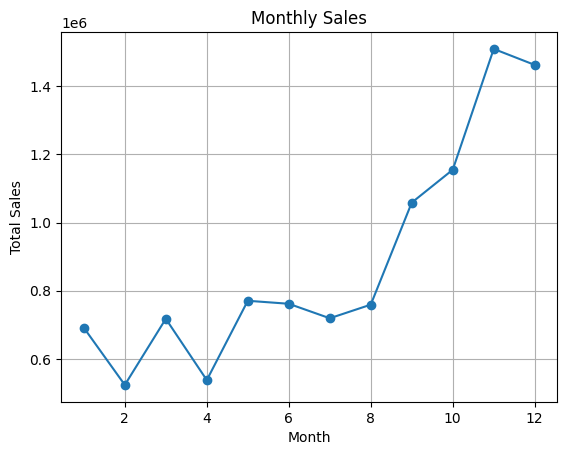

In [26]:
Monthly_sales=df3.groupby("month")["TotalSales"].sum()
Monthly_sales.plot(kind="line",title="Monthly Sales", marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

**Inshights**

Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year.

2. Top 5 Countries

In [27]:
top_countries = df3.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
top_countries


,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


### **Visualize Country-wise Total Sales Distribution**

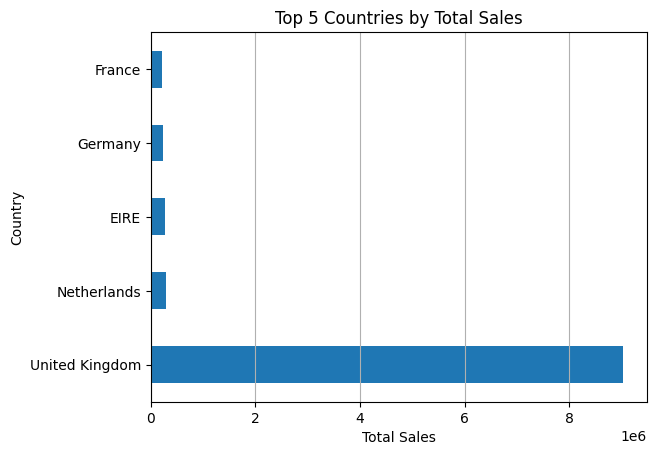

In [28]:
top_countries.plot(kind='barh', title='Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()

### **Visualize top 5 Countries by percentage contribution to total sales**

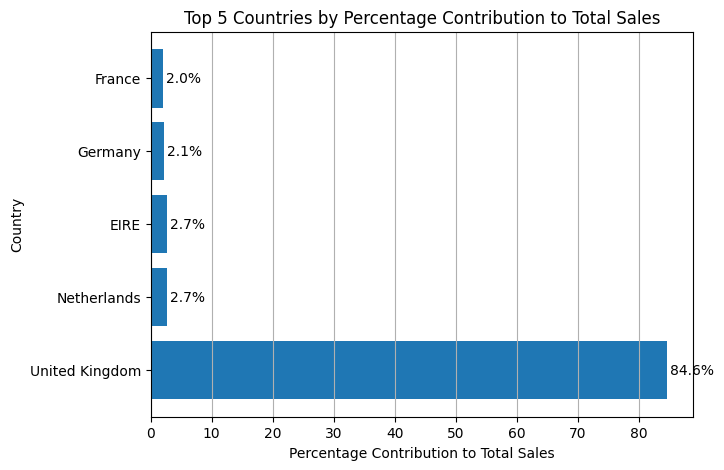

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


country_wise_sales=df3.groupby('Country')['TotalSales'].sum()
top_countries = country_wise_sales.sum()

top_countries = country_wise_sales.sort_values(ascending=False).head(5)
Total_sales = country_wise_sales.sum()
percentages = (top_countries / Total_sales) * 100

plt.figure(figsize=(7, 5))
bars = plt.barh(top_countries.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
             va='center')


plt.show()

### **Visualize Product-wise Total price Distribution**

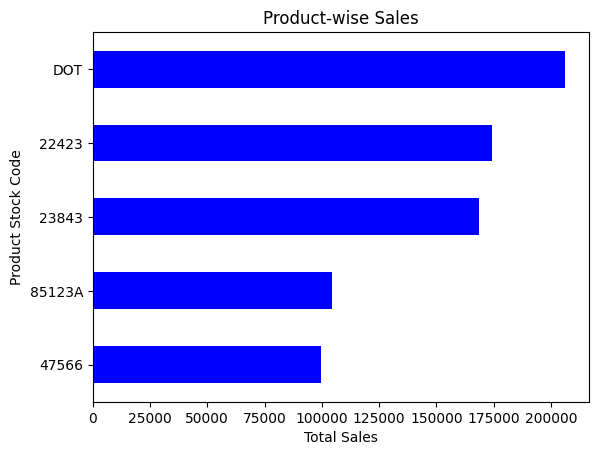

In [30]:
Product_wise_sales=df3.groupby('StockCode')['TotalSales'].sum()
top_countries = Product_wise_sales.sort_values(ascending=False).head(5)
top_countries.plot(kind='barh', color='blue')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Product-wise Sales')
plt.gca().invert_yaxis()
plt.show()

In [31]:
# top Description for top 5 stock code
for stock_code in top_countries.index:
    Describtion = df3[df3.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code}==> {Describtion}")

DOT==> DOTCOM POSTAGE
22423==> REGENCY CAKESTAND 3 TIER
23843==> PAPER CRAFT , LITTLE BIRDIE
85123A==> WHITE HANGING HEART T-LIGHT HOLDER
47566==> PARTY BUNTING


## **RFM Analysis**

RFM Analysis method is used because it is a proven method to segment customers based on their purchasing behavior. It helps identity different type of customer and create targeted marketing strategies.

In [32]:
current_date=df3['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [33]:
# Grouped the customer ID based on their recency, frequency, monetary by their purchasing behavior.
rfm=df3.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})

rfm.columns=['recency', 'frequency', 'monetary']
rfm.head(5)

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [34]:
rfm['R_segment']=pd.qcut(rfm['recency'],4, labels=[4, 3, 2, 1])
rfm['F_segment']=pd.qcut(rfm['frequency'],4, labels=[1, 2, 3, 4])
rfm['M_segment']=pd.qcut(rfm['monetary'],4, labels=[1, 2, 3, 4])
rfm['RFM_score']=rfm[['R_segment','F_segment','M_segment']].sum(axis=1)
rfm.sort_values('RFM_score', ascending=False)


,recency,frequency,monetary,R_segment,F_segment,M_segment,RFM_score
CustomerID,,,,,,,
18283.0,4,756,2094.88,4,4,4,12
18245.0,7,175,2567.06,4,4,4,12
18241.0,10,104,2073.09,4,4,4,12
18229.0,12,164,7276.90,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
...,...,...,...,...,...,...,...
16471.0,275,13,223.95,1,1,1,3
18224.0,264,10,158.95,1,1,1,3
18220.0,227,2,305.28,1,1,1,3


## **Customer Churn Analysis**

In [35]:
customer_last_purchase = df3.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [36]:
current_date

Timestamp('2011-12-10 12:50:00')

**If the recency or Invoice date count is high, it means they haven't made a purchase in a long time, which indicates that customer is likely to churn.**

In [37]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [38]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold=90
churned_customers = customer_last_purchase[customer_last_purchase >= churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


### **Visualize Customer Churn Distribution.**

Number of Churned Customer: 1458


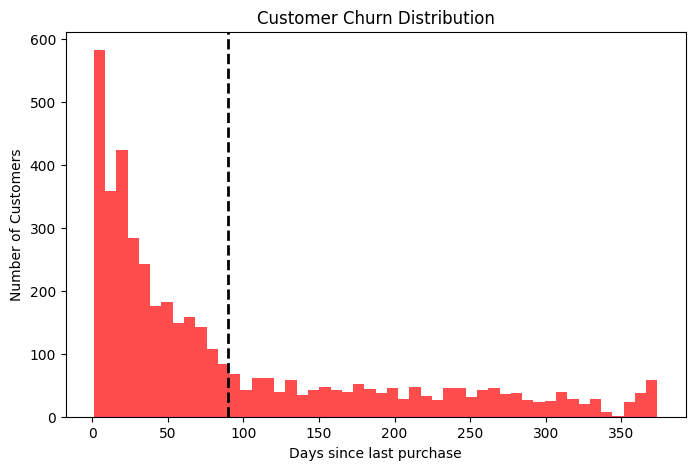

In [39]:
print('Number of Churned Customer:',len(churned_customers))
plt.figure(figsize=(8,5))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Days since last purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()

In [41]:
# Calculate churn rate
total_customers = len(customer_last_purchase)
churned_customers_count = len(churned_customers)
churn_rate = (churned_customers_count / total_customers) * 100

print(f"Customer Churn Rate: {churn_rate:.2f}%")

Customer Churn Rate: 33.61%


we considered 90 days threshold value for each customer, if their purchase history is more than 90 days considered as churned customers.

When a customer is identified as churned(i.e., they haven't made a purchase in a long time), **we should take strategic actions to re-engage them.**

**Re-Engagement Strategies:**

1. Personalized Email & SMS Campaigns
2. Loyalty & Reward Programs
3. Personalized Recommendations & Upselling